<a href="https://colab.research.google.com/github/Muhammad-Rifky/pcvk-ganjil-2024/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


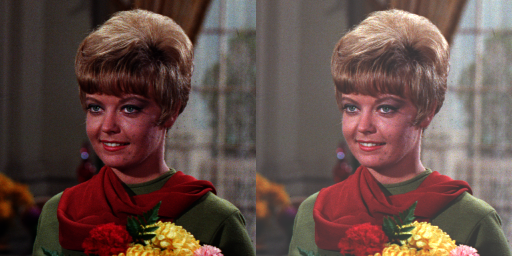

In [67]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MR/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness,0,255)

#cara simpel tanpa loop for
#brigthness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)

 Inverse citra 
---------------


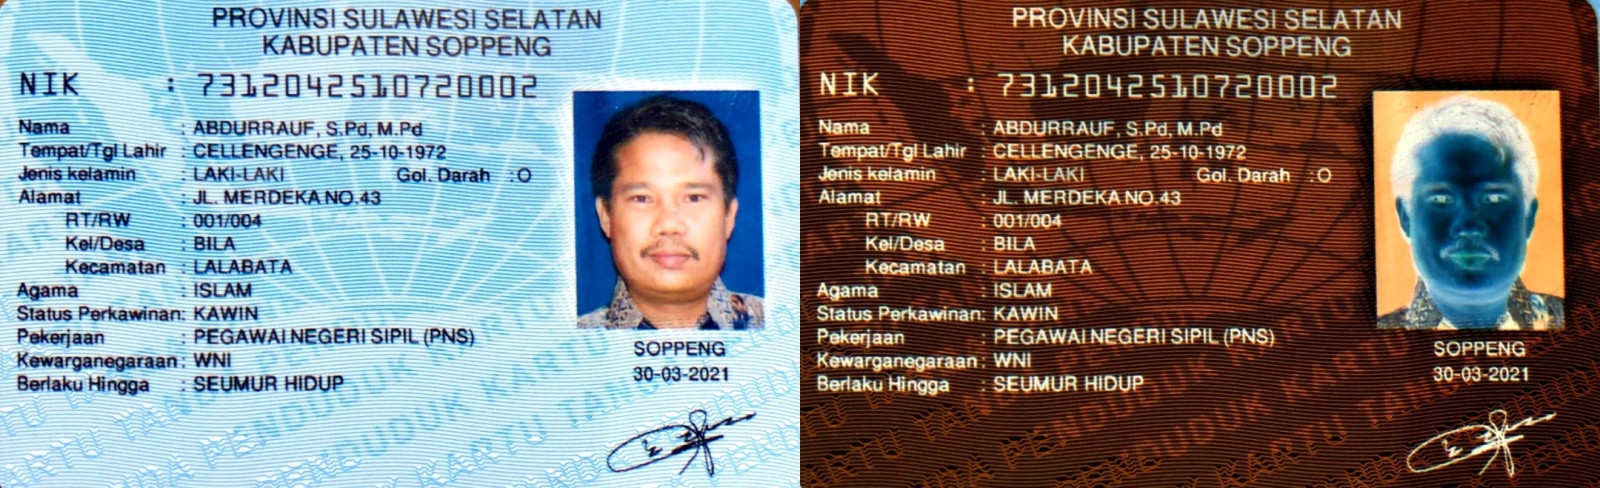

In [68]:
print(' Inverse citra ')
print('---------------')

#baca gambar
image_path =('/content/drive/MyDrive/PCVK_MR/Images/KTP7.jpeg')
original = cv.imread(image_path)

#inverse citra
inverse_image = 255-original

final_frame = cv.hconcat([original,inverse_image])
cv2_imshow(final_frame)

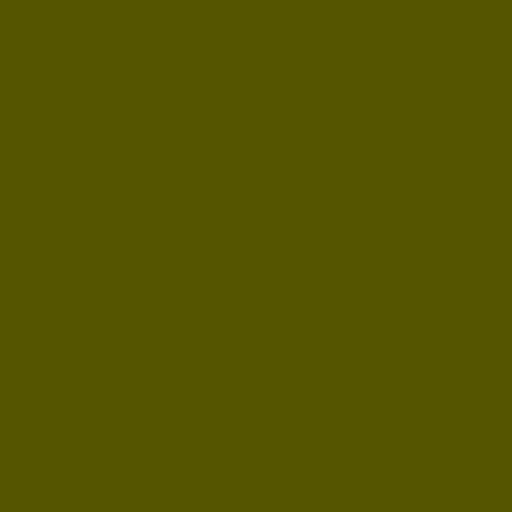

In [69]:
yellow_image = np.zeros([512,512,3], np.uint8)
yellow_image[:,:] = (0,255,255)

gray = ((yellow_image)/3)

cv2_imshow(gray)

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukkan tingkat kecerahan[-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


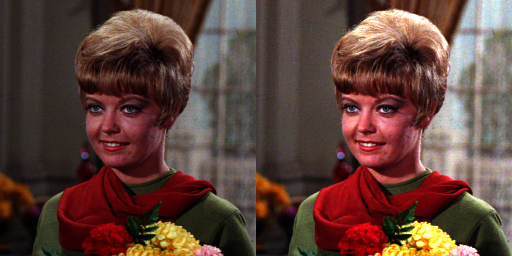

In [70]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan[-255 - 255]: '))
  contrast = int (input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')


image_path = '/content/drive/MyDrive/PCVK_MR/Images/female.tiff'
original = cv.imread(image_path)

alpha = 1.5
beta = 0

contrast_image = cv.convertScaleAbs(original, alpha=alpha, beta=beta)

final_frame = cv.hconcat([original, contrast_image])
cv2_imshow(final_frame)

 Mengubah tingkat kecerahan citra dengan Transformasi log
---------------------------------------------------------
Masukkan nilai kecerahan: 50


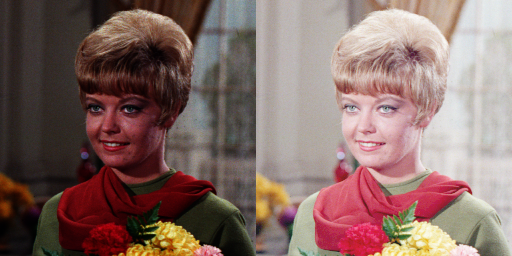

In [71]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi log')
print('---------------------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

# Baca gambar
image_path = '/content/drive/MyDrive/PCVK_MR/Images/female.tiff'
image = cv.imread(image_path,cv.COLOR_BGR2RGB)
# Tentukan konstanta c (misalnya 255/(log(1 + max(r))))
c = 255 / np.log(1 + np.max(image))

    # Terapkan transformasi log pada setiap piksel
log_transform_image = c * (np.log(1 + image))

    # Normalisasi nilai menjadi range 0-255 dan konversi ke tipe uint8
log_transform_image = np.array(log_transform_image, dtype=np.uint8)

    # Gabungkan gambar asli dan hasil transformasi log
final_frame = cv.hconcat([image, log_transform_image])

    # Tampilkan gambar
cv2_imshow(final_frame)

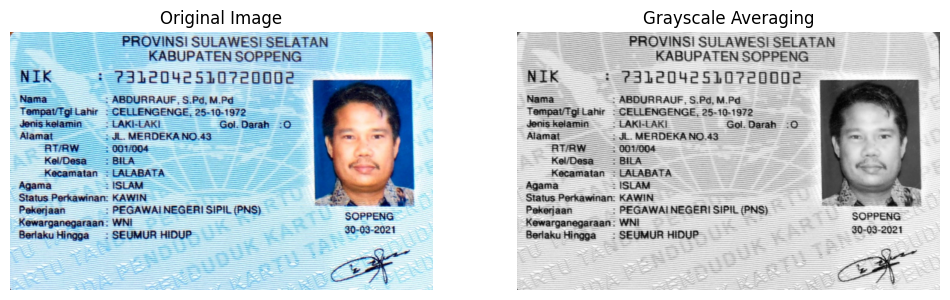

In [72]:


# Fungsi untuk mengonversi citra RGB ke grayscale menggunakan metode averaging
def grayscale_averaging(image):
    return np.mean(image, axis=2).astype(np.uint8)

# Fungsi untuk mengonversi citra RGB ke grayscale menggunakan metode lightness
def grayscale_lightness(image):
    min_val = np.min(image, axis=2)
    max_val = np.max(image, axis=2)
    return ((max_val + min_val) / 2).astype(np.uint8)

# Fungsi untuk mengonversi citra RGB ke grayscale menggunakan metode luminance
def grayscale_luminance(image):
    return (0.21 * image[:, :, 0] + 0.72 * image[:, :, 1] + 0.07 * image[:, :, 2]).astype(np.uint8)

# Memuat citra RGB
# Ganti 'path_to_your_image.jpg' dengan path ke citra Anda di Colab
image = cv2.imread('/content/drive/MyDrive/PCVK_MR/Images/KTP7.jpeg')

# Mengonversi citra dari BGR ke RGB (OpenCV memuat gambar dalam format BGR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Menerapkan metode grayscale
gray_avg = grayscale_averaging(image_rgb)
gray_light = grayscale_lightness(image_rgb)
gray_lum = grayscale_luminance(image_rgb)

# Menampilkan hasil
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Grayscale Averaging')
plt.imshow(gray_avg, cmap='gray')
plt.axis('off')

plt.show()


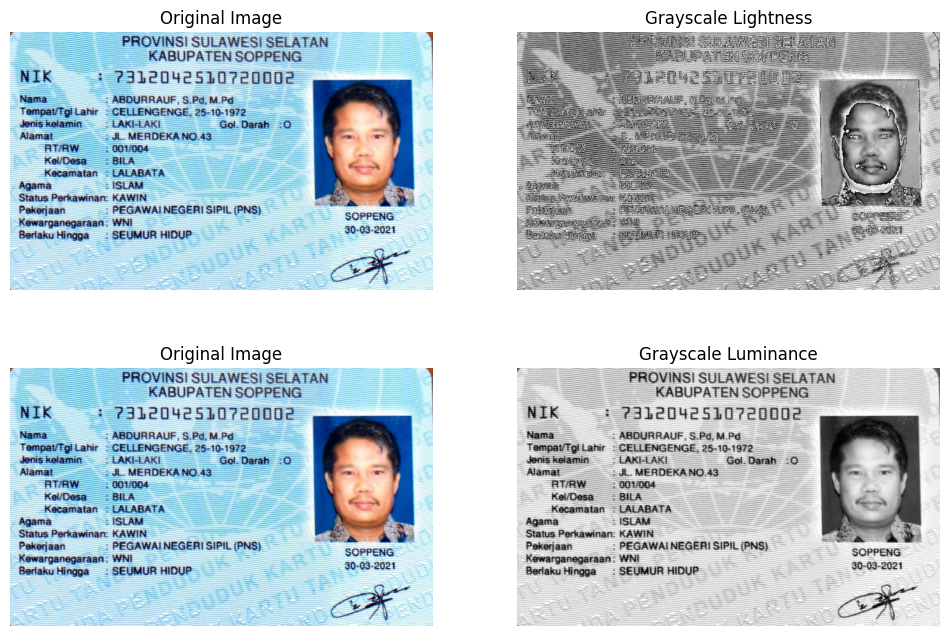

In [73]:
# Fungsi untuk mengonversi citra RGB ke grayscale menggunakan metode lightness
def grayscale_lightness(image):
    min_val = np.min(image, axis=2)
    max_val = np.max(image, axis=2)
    return ((max_val + min_val) / 2).astype(np.uint8)

# Fungsi untuk mengonversi citra RGB ke grayscale menggunakan metode luminance
def grayscale_luminance(image):
    return (0.21 * image[:, :, 0] + 0.72 * image[:, :, 1] + 0.07 * image[:, :, 2]).astype(np.uint8)

# Memuat citra RGB
# Ganti 'path_to_your_image.jpg' dengan path ke citra Anda di Colab
image = cv2.imread('/content/drive/MyDrive/PCVK_MR/Images/KTP7.jpeg')

# Mengonversi citra dari BGR ke RGB (OpenCV memuat gambar dalam format BGR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Menerapkan metode grayscale
gray_light = grayscale_lightness(image_rgb)
gray_lum = grayscale_luminance(image_rgb)

# Menampilkan hasil
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Grayscale Lightness')
plt.imshow(gray_light, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Grayscale Luminance')
plt.imshow(gray_lum, cmap='gray')
plt.axis('off')

plt.show()


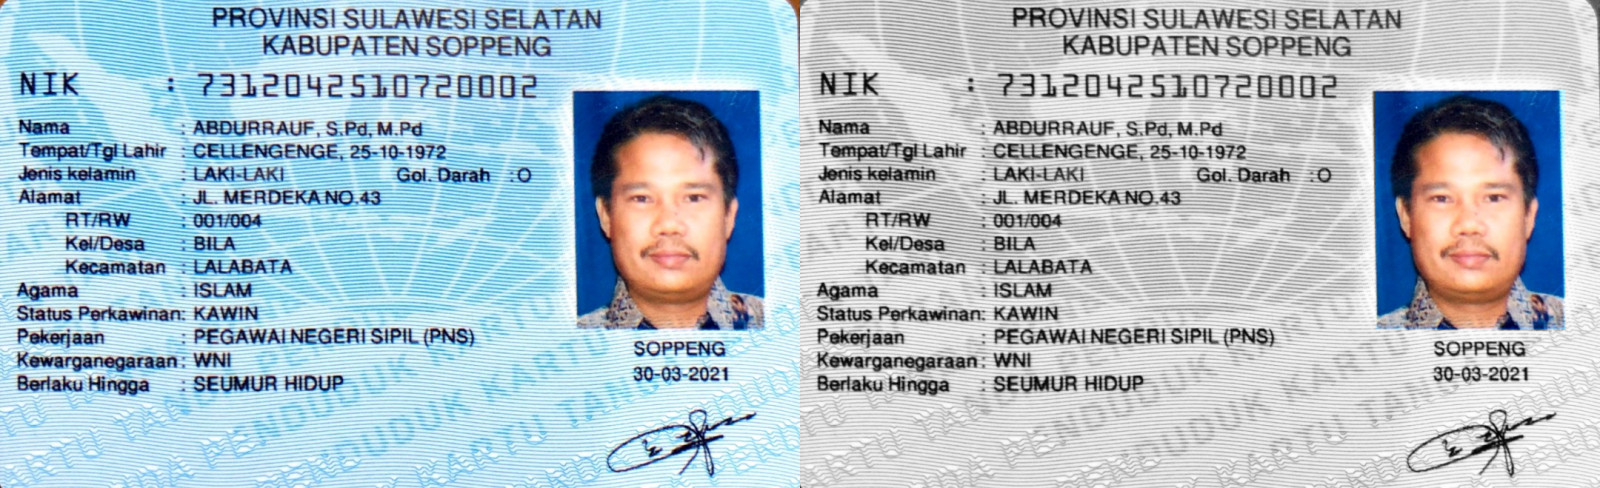

In [93]:
# Membaca gambar KTP
image = cv2.imread('/content/drive/MyDrive/PCVK_MR/Images/KTP7.jpeg')

# Mendefinisikan area pas foto (misalnya, dengan kotak persegi panjang)
# Gantilah nilai ini dengan koordinat yang sesuai dengan foto Anda
x, y, w, h = 575, 90, 190, 240

# Membuat mask untuk area pas foto
mask = np.zeros(image.shape[:2], dtype=np.uint8)
mask[y:y+h, x:x+w] = 255

# Mengubah gambar ke grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)

# Mengaplikasikan mask pada gambar grayscale
result = np.where(mask[:, :, None] == 255, image, gray_image)

final_frame = cv.hconcat([image,result])

# Menyimpan hasil
cv2.imwrite('ktp_grayscale.jpg', result)
cv2_imshow(final_frame)